<a href="https://colab.research.google.com/github/rpizarrog/simulacion/blob/main/python%20casos/CASO_02_prueba_de_uniformidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Realizar prueba estadística de uniformidad chi cuadrada y llegar a interpretación y comparar resultados.

Se crean dos muestras de datos, una primer muestra generada de números pseudoaleatorios a partir de funciones de Python entre 0 y 1; la segunda muestra con valores aleatorios y creados manualmente entre 0 y 100.



# Desarrollo



## Cargar librerías


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency
from numpy.random.mtrand import seed

## Crear los datos aleatorios

Se crea una primera muestra con valores pseudoaletorios. Se crean 30 datos de la primer meustra llamada *datos_aleatorios*. ¿Los datos pasan la prueba de uniformidad?



In [39]:

# Se generan 30 datos ...
n = 30
seed(2023)
datos_aleatorios = np.round(np.random.rand(n), 2)  # Datos aleatorios entre 0 y 1

datos_aleatorios




array([0.32, 0.89, 0.59, 0.13, 0.14, 0.47, 0.02, 0.73, 0.52, 0.54, 0.46,
       0.5 , 0.39, 0.15, 0.36, 0.16, 0.34, 0.18, 0.39, 0.04, 0.56, 0.2 ,
       0.32, 0.38, 0.18, 0.1 , 0.45, 0.2 , 0.38, 0.93])

### Análisis descriptivo de los datos aletorios

Se describen los datos_aleatorios_1


In [40]:
# Mostrar estadísticas descriptivas
media = np.mean(datos_aleatorios)
desviacion_estandar = np.std(datos_aleatorios)
minimo = np.min(datos_aleatorios)
maximo = np.max(datos_aleatorios)

print(f"Datos aleatorios generados ({n} datos):")
print(datos_aleatorios)
print(f"Media: {media:.2f}")
print(f"Desviación Estándar: {desviacion_estandar:.2f}")
print(f"Valor Mínimo: {minimo:.2f}")
print(f"Valor Máximo: {maximo:.2f}")

Datos aleatorios generados (30 datos):
[0.32 0.89 0.59 0.13 0.14 0.47 0.02 0.73 0.52 0.54 0.46 0.5  0.39 0.15
 0.36 0.16 0.34 0.18 0.39 0.04 0.56 0.2  0.32 0.38 0.18 0.1  0.45 0.2
 0.38 0.93]
Media: 0.37
Desviación Estándar: 0.23
Valor Mínimo: 0.02
Valor Máximo: 0.93


## Realizar la prueba estadística de uniformidad

Se utilizan 10 clases y se determina el valor de chi cuadrada

$$
\chi^{2}_o = \sum_{i=1}^{n}{\frac{(E_i - O_i)^2}{E_i}}
$$

In [42]:
# Realizar prueba de uniformidad (Chi-cuadrado)
# Definir el número de clases deseado
n_clases = 5

# Realizar la prueba de Chi-cuadrado
frecuencias_observadas, bin_edges = np.histogram(datos_aleatorios, bins=n_clases)
frecuencias_esperadas = np.ones(n_clases) * len(datos_aleatorios) / n_clases  # Frecuencias esperadas uniformes

print(frecuencias_observadas)
print(frecuencias_esperadas)
print ("bin edges", bin_edges)

chi2_stat = sum((frecuencias_observadas - frecuencias_esperadas) ** 2 / frecuencias_esperadas)

# Calcular el valor p
gl = n_clases - 1
p_valor = 1 - chi2.cdf(chi2_stat, df= gl) # Probabilidad cola a la derecha


print("Valor del estadístico chi cuadrada", np.round(chi2_stat, 4))
print("Valor estadístico p.valor: ", np.round(p_valor, 4))

[11  6  9  2  2]
[6. 6. 6. 6. 6.]
bin edges [0.02  0.202 0.384 0.566 0.748 0.93 ]
Valor del estadístico chi cuadrada 11.0
Valor estadístico p.valor:  0.0266


### Valor de significancia estadística de  alfa

Se declara el valor del alfa al 95 % el nivel de confianza:

$$
\alpha = 1 - confianza \therefore \\
\alpha = 1 - 0.95  = 0.05
$$

### Declarar Hipótesis nula y alternativa

Se declara hipótesis nula y alternativa y la decisión de aceptar o rechazar comparando el estadístico contra el valor de alfa.

Estas hipótesis $H_0$ y $H_a$ es para cualquier prueba de uniformidad.

Hipótesis:

$$
H_0 : \text{Los números cumplen con la prueba estadística de uniformidad chi cuadrada} \\
H_a : \text{Los números NO cumplen la prueba estadística de uniformidad chi cuadrada}
$$

Criterio de aceptación o rechazo:

$$
	Si (p.valor < alfa): \\
  \text{ Se rechaza Ho}\\
	Si (p.valor  ≥ alfa) \\
  \text { Se acepta Ho}
$$




### Evaluar el p.valor contra el valor de alfa

In [18]:
# Estas hipótesis  H0  y  Ha  es para cualquier prueba de uniformidad
H0 = "Los datos SI cumplen con la prueba estadística de uniformidad chi cuadrada"
Ha = "Los datos NO cumplen con la prueba estadística de uniformidad chi cuadrada"
alfa = 0.05  # Nivel de significancia

In [34]:
if p_valor < alfa:
  resultado = "Se rechaza H0: \n"+ Ha + "; p_valor = " + str(np.round(p_valor, 2))
else:
  resultado = "Se acepta H0: \n" + H0 +  "; p_valor = " + str(np.round(p_valor, 2))
print (resultado)


Se rechaza H0: 
Los datos NO cumplen con la prueba estadística de uniformidad chi cuadrada; p_valor = 0.03


### Visualizando los datos aletorios chi cuadrada

Se visualiza la densidad de mil datos entre un rango del valor mínimo y máximo de los datos aleatorios.

Se generan una secuencia de mil números desde el valor mínimo hasta el valor máximo multipicado por 10 la línea mas extensa y se visualzia su densidad tipo chi cuadrada.

Se visualiza el área del 5% cola a la derecha que es valor de alfa definido inicialmente.

Se visualiza línea de valor del estadístico chi cuadrada $\chi^{2}$ que define si está en zona de rechado o aceptación de la hipótesis nula $H_0$.


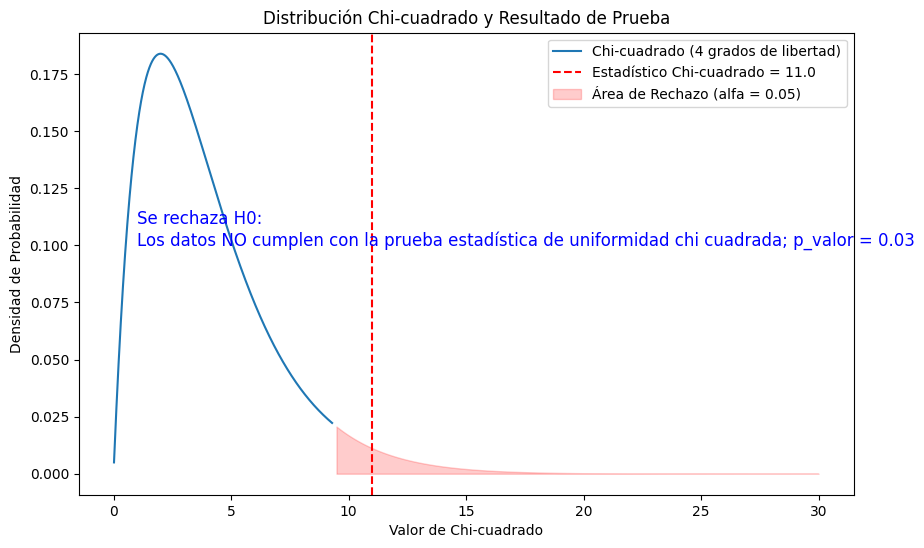

In [35]:
# Graficar la distribución Chi-cuadrado
x = np.linspace(np.min(datos_aleatorios), np.max(datos_aleatorios) * 10, 1000)
pdf = chi2.pdf(x, df = gl)

# Visualizar
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Chi-cuadrado ({gl} grados de libertad)')
plt.axvline(x=chi2_stat, color='red', linestyle='--', label=f'Estadístico Chi-cuadrado = {chi2_stat}')

# Agregar un sombreado en el área de rechazo
x_rechazo = np.linspace(chi2.ppf(1 - alfa, df=gl), 30, 1000)
plt.fill_between(x_rechazo, chi2.pdf(x_rechazo, df=gl), color='red', alpha=0.2, label=f'Área de Rechazo (alfa = {alfa})')

# Etiquetas y leyenda
plt.xlabel('Valor de Chi-cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar el resultado en el gráfico
plt.annotate(resultado, xy=(1, 0.1), fontsize=12, color='blue')
plt.title('Distribución Chi-cuadrado y Resultado de Prueba')

# Mostrar el gráfico
plt.show()

## Determinar prueba de otros datos

¿Los otros datos pasan la prueba de uniformidad?

In [46]:
# Otros datos

otros_datos = np.array([2.20,20.80, 45,65, 45.90, 56.80, 5.20, 17.40, 2.80, 3.20,
                        10.24, 12.34, 15.54, 54.30, 15.65, 72.82, 75.19, 52.97,
                        45.76, 12.84, 42.69, 75.20, 30.67, 20.80, 19.22, 45.10,
                        0.10, 10.32, 49.48, 70.07, 51.19, 53.09, 20.37, 23.96,
                        11.21, 49.64, 75.87, 54.27, 51.97, 49.84, 13.70, 76.25,
                        79.00, 21.24, 15.17, 54.57, 42.32, 11.24 ])
print(otros_datos)

# Definir el número de clases deseado
n_clases = 5

# Realizar la prueba de Chi-cuadrado
frecuencias_observadas, bin_edges = np.histogram(otros_datos, bins=n_clases)
frecuencias_esperadas = np.ones(n_clases) * len(otros_datos) / n_clases  # Frecuencias esperadas uniformes

print(frecuencias_observadas)
print(frecuencias_esperadas)
print ("bin edges", bin_edges)

chi2_stat = sum((frecuencias_observadas - frecuencias_esperadas) ** 2 / frecuencias_esperadas)

# Calcular el valor p
gl = n_clases - 1
p_valor = 1 - chi2.cdf(chi2_stat, df= gl) # Probabilidad cola a la derecha


print("Valor del estadístico chi cuadrada", np.round(chi2_stat, 4))
print("Valor estadístico p.valor: ", np.round(p_valor, 4))
# Calcular el valor p
gl = n_clases - 1
p_valor = 1 - chi2.cdf(chi2_stat, df= gl) # Probabilidad cola a la derecha


print("Valor del estadístico chi cuadrada", np.round(chi2_stat, 2))
print("Valor estadístico p.valor: ", np.round(p_valor, 2))

if p_valor < alfa:
  resultado = "Se rechaza H0: \n"+ Ha + "; p_valor = " + str(np.round(p_valor, 2))
else:
  resultado = "Se acepta H0: \n" + H0 +  "; p_valor = " + str(np.round(p_valor, 2))
print (resultado)



[ 2.2  20.8  45.   65.   45.9  56.8   5.2  17.4   2.8   3.2  10.24 12.34
 15.54 54.3  15.65 72.82 75.19 52.97 45.76 12.84 42.69 75.2  30.67 20.8
 19.22 45.1   0.1  10.32 49.48 70.07 51.19 53.09 20.37 23.96 11.21 49.64
 75.87 54.27 51.97 49.84 13.7  76.25 79.   21.24 15.17 54.57 42.32 11.24]
[15  8  6 11  8]
[9.6 9.6 9.6 9.6 9.6]
bin edges [ 0.1  15.88 31.66 47.44 63.22 79.  ]
Valor del estadístico chi cuadrada 5.125
Valor estadístico p.valor:  0.2747
Valor del estadístico chi cuadrada 5.12
Valor estadístico p.valor:  0.27
Se acepta H0: 
Los datos SI cumplen con la prueba estadística de uniformidad chi cuadrada; p_valor = 0.27


### Visualizar otros datos (Distribución chi cuadrada)

Se generan una secuencia de mil datos desde el valor mínimo hasta el valor máximo y se visualzia su densidad tipo chi cuadrada

Se visualiza el área del 5% cola a la derecha que es valor de alfa definido inicialmente.

Se visualiza línea de valor del estadístico chi cuadrada $\chi^{2}$ que define si está en zona de rechado o aceptación de la hipótesis nula $H_0$.

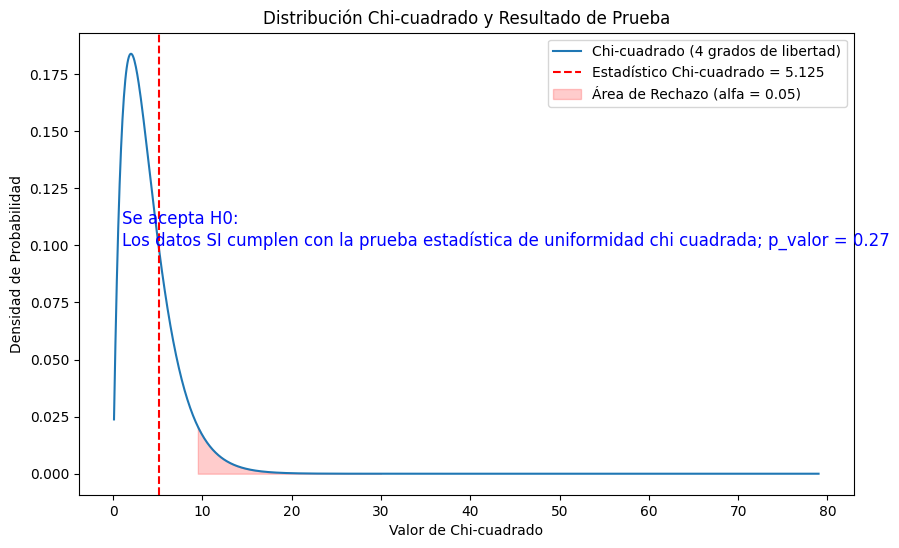

In [47]:
# Graficar la distribución Chi-cuadrado
x = np.linspace(np.min(otros_datos), np.max(otros_datos), 1000)
pdf = chi2.pdf(x, df = gl)

# Visualizar
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Chi-cuadrado ({gl} grados de libertad)')
plt.axvline(x=chi2_stat, color='red', linestyle='--', label=f'Estadístico Chi-cuadrado = {chi2_stat}')

# Agregar un sombreado en el área de rechazo
x_rechazo = np.linspace(chi2.ppf(1 - alfa, df=gl), 30, 1000)
plt.fill_between(x_rechazo, chi2.pdf(x_rechazo, df=gl), color='red', alpha=0.2, label=f'Área de Rechazo (alfa = {alfa})')

# Etiquetas y leyenda
plt.xlabel('Valor de Chi-cuadrado')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

# Mostrar el resultado en el gráfico
plt.annotate(resultado, xy=(1, 0.1), fontsize=12, color='blue')
plt.title('Distribución Chi-cuadrado y Resultado de Prueba')

# Mostrar el gráfico
plt.show()

# Interpretación


In [23]:
import numpy as np
from scipy.stats import chi2

# Datos originales
datos_originales = np.array([0.32, 0.89, 0.59, 0.13, 0.14, 0.47, 0.02, 0.73, 0.52, 0.54, 0.46, 0.50, 0.39, 0.15, 0.36, 0.16, 0.34, 0.18, 0.39, 0.04, 0.56, 0.20, 0.32, 0.38, 0.18, 0.10, 0.45, 0.20, 0.38, 0.93])

# Definir el número de clases deseado
n_clases = 5

# Calcular los límites de clase
intervalos = np.linspace(min(datos_originales), max(datos_originales), n_clases + 1)

# Construir una tabla de contingencia (frecuencias observadas)
frecuencias_observadas, bin_edges = np.histogram(datos_originales, bins=intervalos)

# Calcular las frecuencias esperadas si los datos fueran uniformemente distribuidos
frecuencias_esperadas = np.ones(n_clases) * len(datos_originales) / n_clases

# Calcular el valor de chi-cuadrado
chi2_stat = sum((frecuencias_observadas - frecuencias_esperadas) ** 2 / frecuencias_esperadas)

# Grados de libertad
grados_de_libertad = n_clases - 1

# Calcular el valor crítico de chi-cuadrado para un nivel de significancia (alfa) del 0.05
alfa = 0.05
valor_critico = chi2.ppf(1 - alfa, df=grados_de_libertad)

# Imprimir resultados
print("Tabla de Contingencia (Frecuencias Observadas):")
print(frecuencias_observadas)
print("\nFrecuencias Esperadas (si fuera uniforme):")
print(frecuencias_esperadas)
print("\nValor de Chi-cuadrado:", chi2_stat)
print("Grados de Libertad:", grados_de_libertad)
print("Valor Crítico de Chi-cuadrado:", valor_critico)

# Comprobar si se acepta o rechaza la hipótesis de uniformidad
if chi2_stat > valor_critico:
    print("\nSe rechaza la hipótesis de uniformidad.")
else:
    print("\nNo se rechaza la hipótesis de uniformidad.")


Tabla de Contingencia (Frecuencias Observadas):
[11  6  9  2  2]

Frecuencias Esperadas (si fuera uniforme):
[6. 6. 6. 6. 6.]

Valor de Chi-cuadrado: 11.0
Grados de Libertad: 4
Valor Crítico de Chi-cuadrado: 9.487729036781154

Se rechaza la hipótesis de uniformidad.
